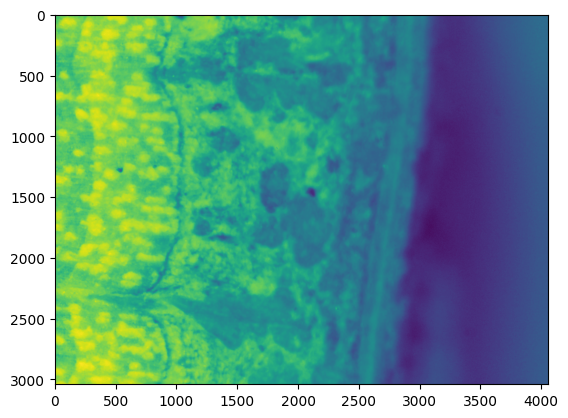

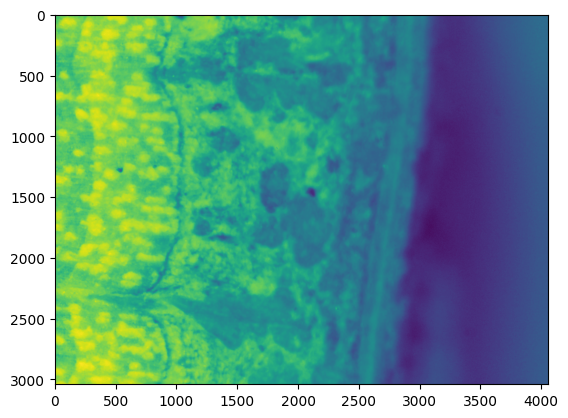

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = "C:/Users/chloe/wolkovich_s24/TreeRings/code/focus_stacking_testing/edge_sm_10/image_10_10_40.jpg"
img2_path = "C:/Users/chloe/wolkovich_s24/TreeRings/code/focus_stacking_testing/edge_sm_10/image_10_10_29.jpg"
 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

plt.imshow(img),plt.show()

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(img),plt.show()


ret2, thresh2 = cv2.threshold(img2, 127, 255, 0)
contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont = cv2.drawContours(img, contours, -1, (0,255,0), 3)
img2_cont = cv2.drawContours(img2, contours2, -1, (0,255,0), 3)


In [72]:
detector = cv2.SIFT_create()#contrastThreshold = 0.05, edgeThreshold = 100)


image_1_kp, image_1_desc = detector.detectAndCompute(img_cont, None)
image_2_kp, image_2_desc = detector.detectAndCompute(img2_cont, None)

In [86]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(image_1_desc, image_2_desc, k=2)


good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)



In [80]:
# img3 = cv2.drawMatchesKnn(img,image_1_kp,img2,image_2_kp,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
# plt.imshow(img3),plt.show()
# plt.imshow(img),plt.show()

matches[0][0]

< cv2.DMatch 0000016000868A50>

In [88]:
def findHomography(image_1_kp, image_2_kp, matches):
        image_1_points = np.zeros((len(matches), 1, 2), dtype=np.float32)
        image_2_points = np.zeros((len(matches), 1, 2), dtype=np.float32)

        for i in range(0,len(matches)):
            image_1_points[i] = image_1_kp[matches[i].queryIdx].pt
            image_2_points[i] = image_2_kp[matches[i].trainIdx].pt


        homography, mask = cv2.findHomography(image_1_points, image_2_points, cv2.RANSAC, ransacReprojThreshold=2.0)

        return homography

In [89]:
hom = findHomography(image_2_kp, image_1_kp, matches)
newimage = cv2.warpPerspective(img2, hom, (img2.shape[1], img2.shape[0]), flags=cv2.INTER_LINEAR)

AttributeError: 'tuple' object has no attribute 'queryIdx'

In [ ]:
#  scale = 1
#  scaleSmall = 4
#  scaleDiff = scaleSmall / scale

#      for (i = 0 i< numImages i++) {
#         file = dir + image + to_string(i) + ".jpg"
#         col[i] = imread(file)

#         resize(col[i], z[i], Size(col[i].cols/scale, col[i].rows/scale))       
#         cvtColor(z[i], zg[i], CV_BGR2GRAY)
#         resize(zg[i], zgSmall[i],  Size(col[i].cols / scaleSmall, col[i].rows / scaleSmall))
#      }

#     // Set a 2x3 or 3x3 warp matrix depending on the motion model.
#     // See https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/
#     // Define the motion model
#     const warp_mode = MOTION_HOMOGRAPHY

#     // Initialize the matrix to identity
#     if (warp_mode == MOTION_HOMOGRAPHY) {
#         warp_init = Mat::eye(3, 3, CV_32F)
#         warp_matrix = Mat::eye(3, 3, CV_32F)
#         warp_matrix_prev = Mat::eye(3, 3, CV_32F)
#         scaleTX = (Mat_<float>(3, 3) << 1, 1, scaleDiff, 1, 1, scaleDiff, 1 / scaleDiff, 1 / scaleDiff, 1)
#     }
#     else {
#         warp_init = Mat::eye(2, 3, CV_32F)
#         scaleTX = Mat::eye(2, 3, CV_32F)
#         warp_matrix = Mat::eye(2, 3, CV_32F)
#         warp_matrix_prev = Mat::eye(2, 3, CV_32F)
#         scaleTX = (Mat_<float>(2, 3) << 1, 1, scaleDiff, 1, 1, scaleDiff)
#     }

#     // Specify the number of iterations.
#     number_of_iterations = 5000

#     // Specify the threshold of the increment
#     // in the correlation coefficient between two iterations
#     double termination_eps = 1e-8

#     // Define termination criteria
#     TermCriteria criteria(TermCriteria::COUNT + TermCriteria::EPS, number_of_iterations, termination_eps)

#     for (i = 1 i < numImages i++) {
#         // Check images right size
#         if (zg[0].rows < 10 || zg[1].rows < 10)
#             return

#         // Run the ECC algorithm at start to get an initial guess. The results are stored in warp_matrix.
#         if (i == 1) {
#             findTransformECC(zgSmall[0], zgSmall[i], warp_init, warp_mode, criteria     )

#             // See https://stackoverflow.com/questions/45997891/cv2-motion-euclidean-for-the-warp-mode-in-ecc-image-alignment-method
#             warp_matrix = warp_init * scaleTX
#         }

#         // Warp Matrix from previous iteration is used as initialisation  
#         findTransformECC(zg[0], zg[i], warp_matrix, warp_mode,  criteria)

#         if (warp_mode != MOTION_HOMOGRAPHY) {
#             warpAffine(zg[i], ag[i], warp_matrix, zg[i].size(), INTER_LINEAR + WARP_INVERSE_MAP)
#             warpAffine(z[i], acol[i], warp_matrix, zg[i].size(), INTER_LINEAR + WARP_INVERSE_MAP)
#         }
#         else {
#             // Use warpPerspective for Homography
#             warpPerspective(z[i], acol[i], warp_matrix, z[i].size(), INTER_LINEAR + WARP_INVERSE_MAP)
#             warpPerspective(zg[i], ag[i], warp_matrix, zg[i].size(), INTER_LINEAR + WARP_INVERSE_MAP)
#            }
#         }
#     }